## Importing libraries

In [2]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from scipy.stats import norm
from tqdm import tqdm
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, f1_score, recall_score


# Reading and understanding the dataset

Let's load our training and test data with assigned features names.

In [3]:
data_train = pd.read_csv("C:/Users/Ons/Downloads/NSL-KDD/KDDTrain+.txt")
data_test = pd.read_csv("C:/Users/Ons/Downloads/NSL-KDD/KDDTest+.txt")

Let's look at first 5 records of our training data.

In [4]:
data_train.head()

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,...,0.17,0.03,0.17.1,0.00.6,0.00.7,0.00.8,0.05,0.00.9,normal,20
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


Let's look at first 5 records of our testing data.

In [5]:
data_test.head()

,0,tcp,private,REJ,0.1,0.2,0.3,0.4,0.5,0.6,...,0.04.1,0.06.1,0.00.3,0.00.4,0.00.5,0.00.6,1.00.2,1.00.3,neptune,21
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21
2,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,15
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11
4,0,tcp,http,SF,267,14515,0,0,0,0,...,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,normal,21


We've put features names in `feature_names` variable so we can assign it later to our training data.

In [6]:
columns = (['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot'
,'num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root','num_file_creations'
,'num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate'
,'srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count'
,'dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate'
,'dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','attack','level'])

In [7]:
data_train.columns = columns

In [8]:
data_test.columns = columns

In [9]:
data_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [10]:
data_test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21
2,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,15
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11
4,0,tcp,http,SF,267,14515,0,0,0,0,...,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,normal,21


📝 Data Information
We indeed see the following:
- binary variables
- categorical variables
- Numerical variables

Let's look at our training data dimensions

In [11]:
data_train.shape

(125972, 43)

We have 43 variables and 125973 rows. Let's see if we have the same number of variables in the test data.

Let's look at our testing data dimensions

In [12]:
data_test.shape

(22543, 43)

We have 43 variables and 22543 rows. Let's see if we have the same number of variables in the test data.

In [13]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125972 non-null  int64  
 1   protocol_type                125972 non-null  object 
 2   service                      125972 non-null  object 
 3   flag                         125972 non-null  object 
 4   src_bytes                    125972 non-null  int64  
 5   dst_bytes                    125972 non-null  int64  
 6   land                         125972 non-null  int64  
 7   wrong_fragment               125972 non-null  int64  
 8   urgent                       125972 non-null  int64  
 9   hot                          125972 non-null  int64  
 10  num_failed_logins            125972 non-null  int64  
 11  logged_in                    125972 non-null  int64  
 12  num_compromised              125972 non-null  int64  
 13 

In [14]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22543 entries, 0 to 22542
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     22543 non-null  int64  
 1   protocol_type                22543 non-null  object 
 2   service                      22543 non-null  object 
 3   flag                         22543 non-null  object 
 4   src_bytes                    22543 non-null  int64  
 5   dst_bytes                    22543 non-null  int64  
 6   land                         22543 non-null  int64  
 7   wrong_fragment               22543 non-null  int64  
 8   urgent                       22543 non-null  int64  
 9   hot                          22543 non-null  int64  
 10  num_failed_logins            22543 non-null  int64  
 11  logged_in                    22543 non-null  int64  
 12  num_compromised              22543 non-null  int64  
 13  root_shell      

## Statistical summary

Let's get a statistical information on our training dataset

In [15]:
data_train.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level
count,125972.000000,1.259720e+05,1.259720e+05,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,...,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000
mean,287.146929,4.556710e+04,1.977927e+04,0.000198,0.022688,0.000111,0.204411,0.001222,0.395739,0.279253,...,115.653725,0.521244,0.082952,0.148379,0.032543,0.284455,0.278487,0.118832,0.120241,19.504056
std,2604.525522,5.870354e+06,4.021285e+06,0.014086,0.253531,0.014366,2.149977,0.045239,0.489011,23.942137,...,110.702886,0.448950,0.188922,0.308998,0.112564,0.444785,0.445670,0.306559,0.319460,2.291512
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.000000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42908.000000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [16]:
data_test.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level
count,22543.000000,2.254300e+04,2.254300e+04,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,...,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000
mean,218.868784,1.039591e+04,2.056110e+03,0.000311,0.008428,0.000710,0.105399,0.021648,0.442222,0.119904,...,140.756332,0.608747,0.090541,0.132267,0.019639,0.097818,0.099430,0.233351,0.226649,18.017833
std,1407.207069,4.727969e+05,2.121976e+04,0.017619,0.142602,0.036474,0.928448,0.150331,0.496661,7.269758,...,111.783059,0.435681,0.220722,0.306274,0.085396,0.273144,0.281872,0.387204,0.400851,4.270409
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,15.000000,0.070000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000
50%,0.000000,5.400000e+01,4.600000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,168.000000,0.920000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.000000,2.870000e+02,6.010000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.060000,0.030000,0.010000,0.000000,0.000000,0.360000,0.170000,21.000000
max,57715.000000,6.282565e+07,1.345927e+06,1.000000,3.000000,3.000000,101.000000,4.000000,1.000000,796.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


# Data Preprocessing

## Handling missing values

<div style="background-color:#DBEDF3; padding:20px; font-size:15px">
Missing values are a recurrent problem in real-world datasets because real-life data has physical and manual limitations.

In [17]:
data_train.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [18]:
data_test.isnull().sum()


duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

<div style="border-radius:5px;border:#283149 solid;background-color:#FFFFFF; padding:20px; font-size:15px"> 
    
- Our training data doesn't contain any missing values.
- Our test data doesn't contain any missing values.
   

## Duplicated Values 

In [19]:
data_train.duplicated().sum()

0

In [20]:
data_test.duplicated().sum()

0

In [21]:
duplicated_rows = data_train[data_train.duplicated()]
duplicated_rows

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level


In [22]:
data_train.drop_duplicates(keep='first', inplace=True)
data_train.reset_index(drop=True, inplace=True)

<div style="border-radius:5px;border:#283149 solid;background-color:#FFFFFF; padding:20px; font-size:15px"> 
    
- Our training and test data dont contain duplicated values 

In [23]:
data_train.shape

(125972, 43)

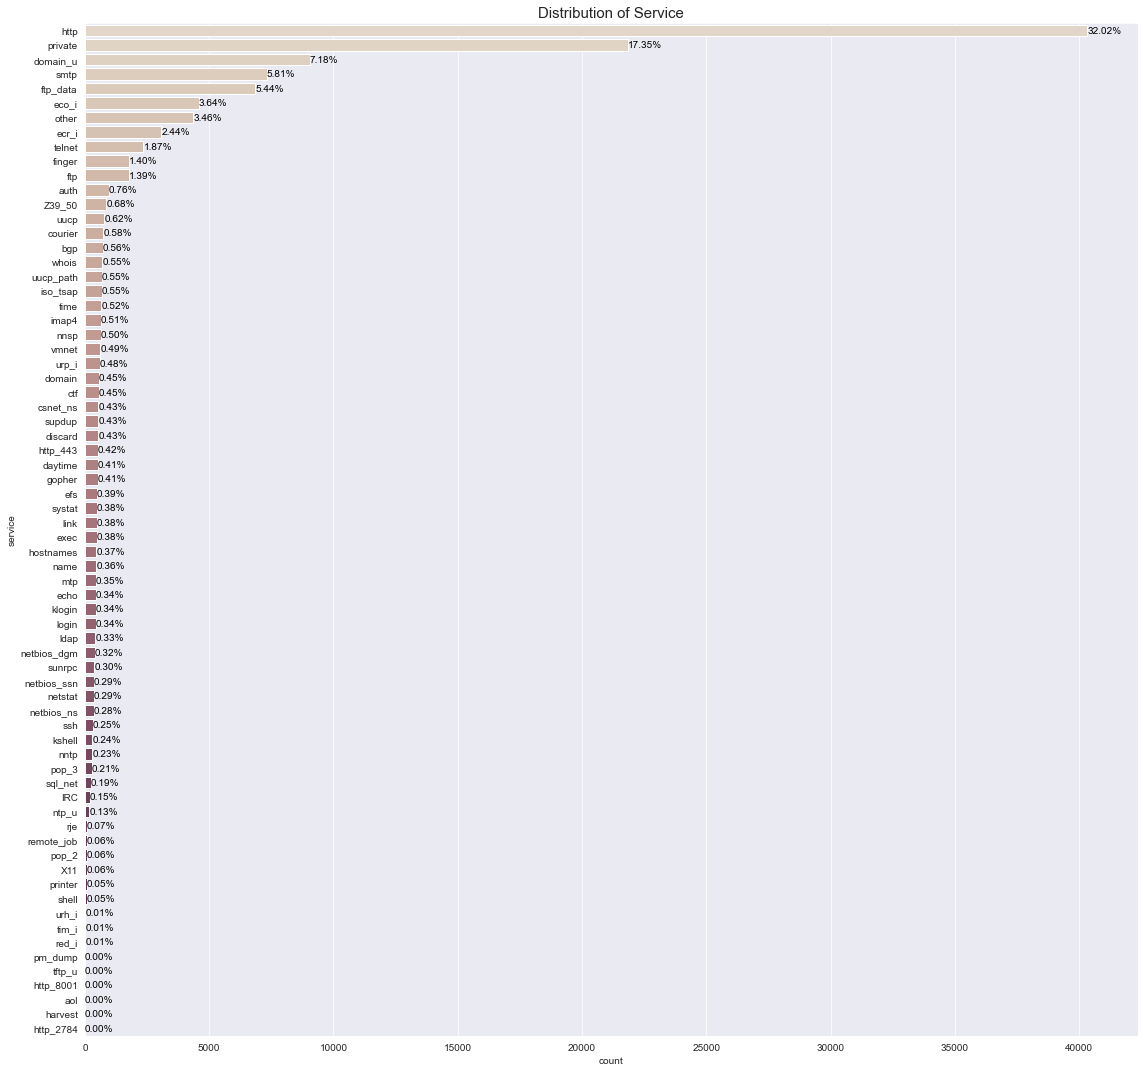

In [24]:
plt.figure(figsize=(16, 15))
sns.set_style('darkgrid')

# Distribution of 'service'
ax = sns.countplot(y='service', data=data_train, order=data_train['service'].value_counts().index, palette='ch:.25')

# Add percentage labels
total = len(data_train['service'])
for p in ax.patches:
    percentage = '{:.2f}%'.format(100 * p.get_width() / total)
    x = p.get_x() + p.get_width() + 0.02
    y = p.get_y() + p.get_height() / 2
    ax.annotate(percentage, (x, y), ha='left', va='center', fontsize=10, color='black')

# Set title and adjust layout
plt.title('Distribution of Service', fontsize=15)
plt.tight_layout()

plt.show()


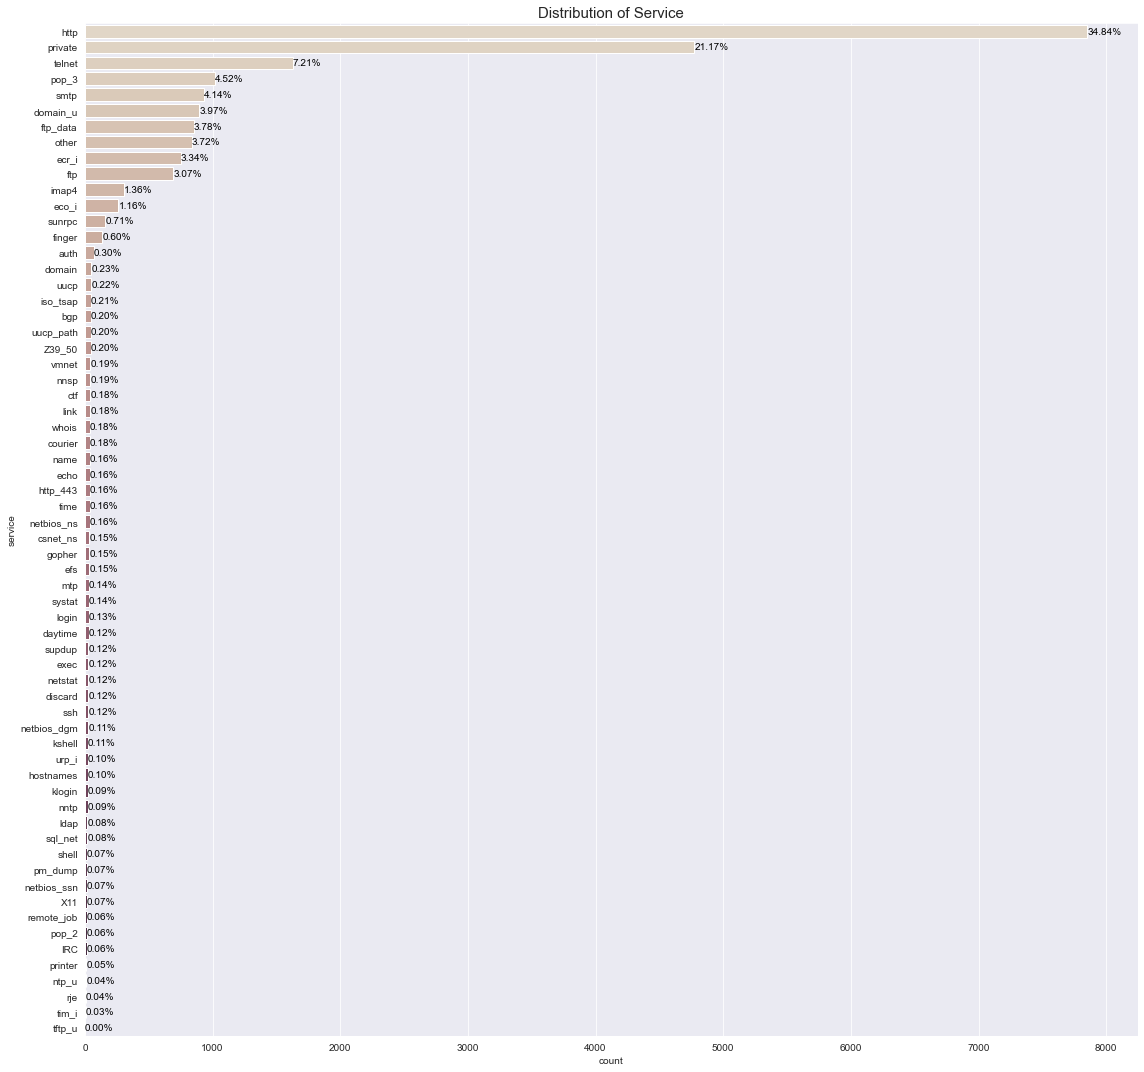

In [25]:
plt.figure(figsize=(16, 15))
sns.set_style('darkgrid')

# Distribution of 'service'
ax = sns.countplot(y='service', data=data_test, order=data_test['service'].value_counts().index, palette='ch:.25')

# Add percentage labels
total = len(data_test['service'])
for p in ax.patches:
    percentage = '{:.2f}%'.format(100 * p.get_width() / total)
    x = p.get_x() + p.get_width() + 0.02
    y = p.get_y() + p.get_height() / 2
    ax.annotate(percentage, (x, y), ha='left', va='center', fontsize=10, color='black')

# Set title and adjust layout
plt.title('Distribution of Service', fontsize=15)
plt.tight_layout()

plt.show()


In [26]:
data_train.nunique()


duration                       2981
protocol_type                     3
service                          70
flag                             11
src_bytes                      3341
dst_bytes                      9326
land                              2
wrong_fragment                    3
urgent                            4
hot                              28
num_failed_logins                 6
logged_in                         2
num_compromised                  88
root_shell                        2
su_attempted                      3
num_root                         82
num_file_creations               35
num_shells                        3
num_access_files                 10
num_outbound_cmds                 1
is_host_login                     2
is_guest_login                    2
count                           512
srv_count                       509
serror_rate                      89
srv_serror_rate                  86
rerror_rate                      82
srv_rerror_rate             

In [27]:
data_test.nunique()

duration                        624
protocol_type                     3
service                          64
flag                             11
src_bytes                      1149
dst_bytes                      3650
land                              2
wrong_fragment                    3
urgent                            4
hot                              16
num_failed_logins                 5
logged_in                         2
num_compromised                  23
root_shell                        2
su_attempted                      3
num_root                         20
num_file_creations                9
num_shells                        4
num_access_files                  5
num_outbound_cmds                 1
is_host_login                     2
is_guest_login                    2
count                           495
srv_count                       457
serror_rate                      88
srv_serror_rate                  82
rerror_rate                      90
srv_rerror_rate             

## Exploring Target Column "Attack"

In [28]:
data_train['attack'].value_counts()

normal             67342
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: attack, dtype: int64

In [29]:
data_test['attack'].value_counts()

normal             9711
neptune            4656
guess_passwd       1231
mscan               996
warezmaster         944
apache2             737
satan               735
processtable        685
smurf               665
back                359
snmpguess           331
saint               319
mailbomb            293
snmpgetattack       178
portsweep           157
ipsweep             141
httptunnel          133
nmap                 73
pod                  41
buffer_overflow      20
multihop             18
named                17
ps                   15
sendmail             14
rootkit              13
xterm                13
teardrop             12
xlock                 9
land                  7
xsnoop                4
ftp_write             3
worm                  2
loadmodule            2
perl                  2
sqlattack             2
udpstorm              2
phf                   2
imap                  1
Name: attack, dtype: int64

## Outliers detection 

We defined boxplots to define outliers seperately within each column

In [ ]:
#Boxplot of all columns to see outliers
data_train.plot(kind='box',subplots=True,layout=(15,3),figsize=(20,40))
plt.show()

# Data Transformation 

Categorizing our target column "Attack" 

In [31]:
attack_n = []
for i in data_train.attack :
  if i == 'normal':
    attack_n.append("normal")
  else:
    attack_n.append("attack")
data_train['attack'] = attack_n

In [32]:
data_train['attack'].value_counts()

normal    67342
attack    58630
Name: attack, dtype: int64

In [33]:
attack_n = []
for i in data_test.attack :
  if i == 'normal':
    attack_n.append("normal")
  else:
    attack_n.append("attack")
data_test['attack'] = attack_n

In [34]:
data_test['attack'].value_counts()

attack    12832
normal     9711
Name: attack, dtype: int64

### Exploring our categorical data 

In [35]:
quantitative_data = data_train.select_dtypes(include='number')
quantitative_data.shape

(125972, 39)

In [36]:
quantitative_data.columns

Index(['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
       'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
       'root_shell', 'su_attempted', 'num_root', 'num_file_creations',
       'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'level'],
      dtype='object')

### Variance


In [37]:
from sklearn.feature_selection import VarianceThreshold
sel= VarianceThreshold(threshold=0.01)
sel.fit(quantitative_data)
mask=sel.get_support()
reduced_df = quantitative_data.loc[:,mask]
num_df = quantitative_data.loc[:,mask]
print(mask)
print(reduced_df.shape)

[ True  True  True False  True False  True False  True  True False False
  True  True False False False False False  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True]
(125972, 29)


In [38]:
reduced_df['src_bytes']

0          146
1            0
2          232
3          199
4            0
          ... 
125967       0
125968     105
125969    2231
125970       0
125971     151
Name: src_bytes, Length: 125972, dtype: int64

In [39]:
reduced_df = pd.concat([reduced_df, data_train.select_dtypes(exclude=['number'])], axis=1)
data_train = reduced_df.copy()
data_train.shape

(125972, 33)

In [40]:
columns_to_keep = data_train.columns.tolist()
data_test = data_test[columns_to_keep]
data_test.shape

(22543, 33)

### Correlation

<div style="background-color:#DBEDF3; padding:20px; font-size:15px">
Correlation is a univariate analysis technique. It detects linear relationships between two variables. Think of correlation as a measure of proportionality, which simply measures how the increase or decrease of a variable affects the other variable.

<AxesSubplot:>

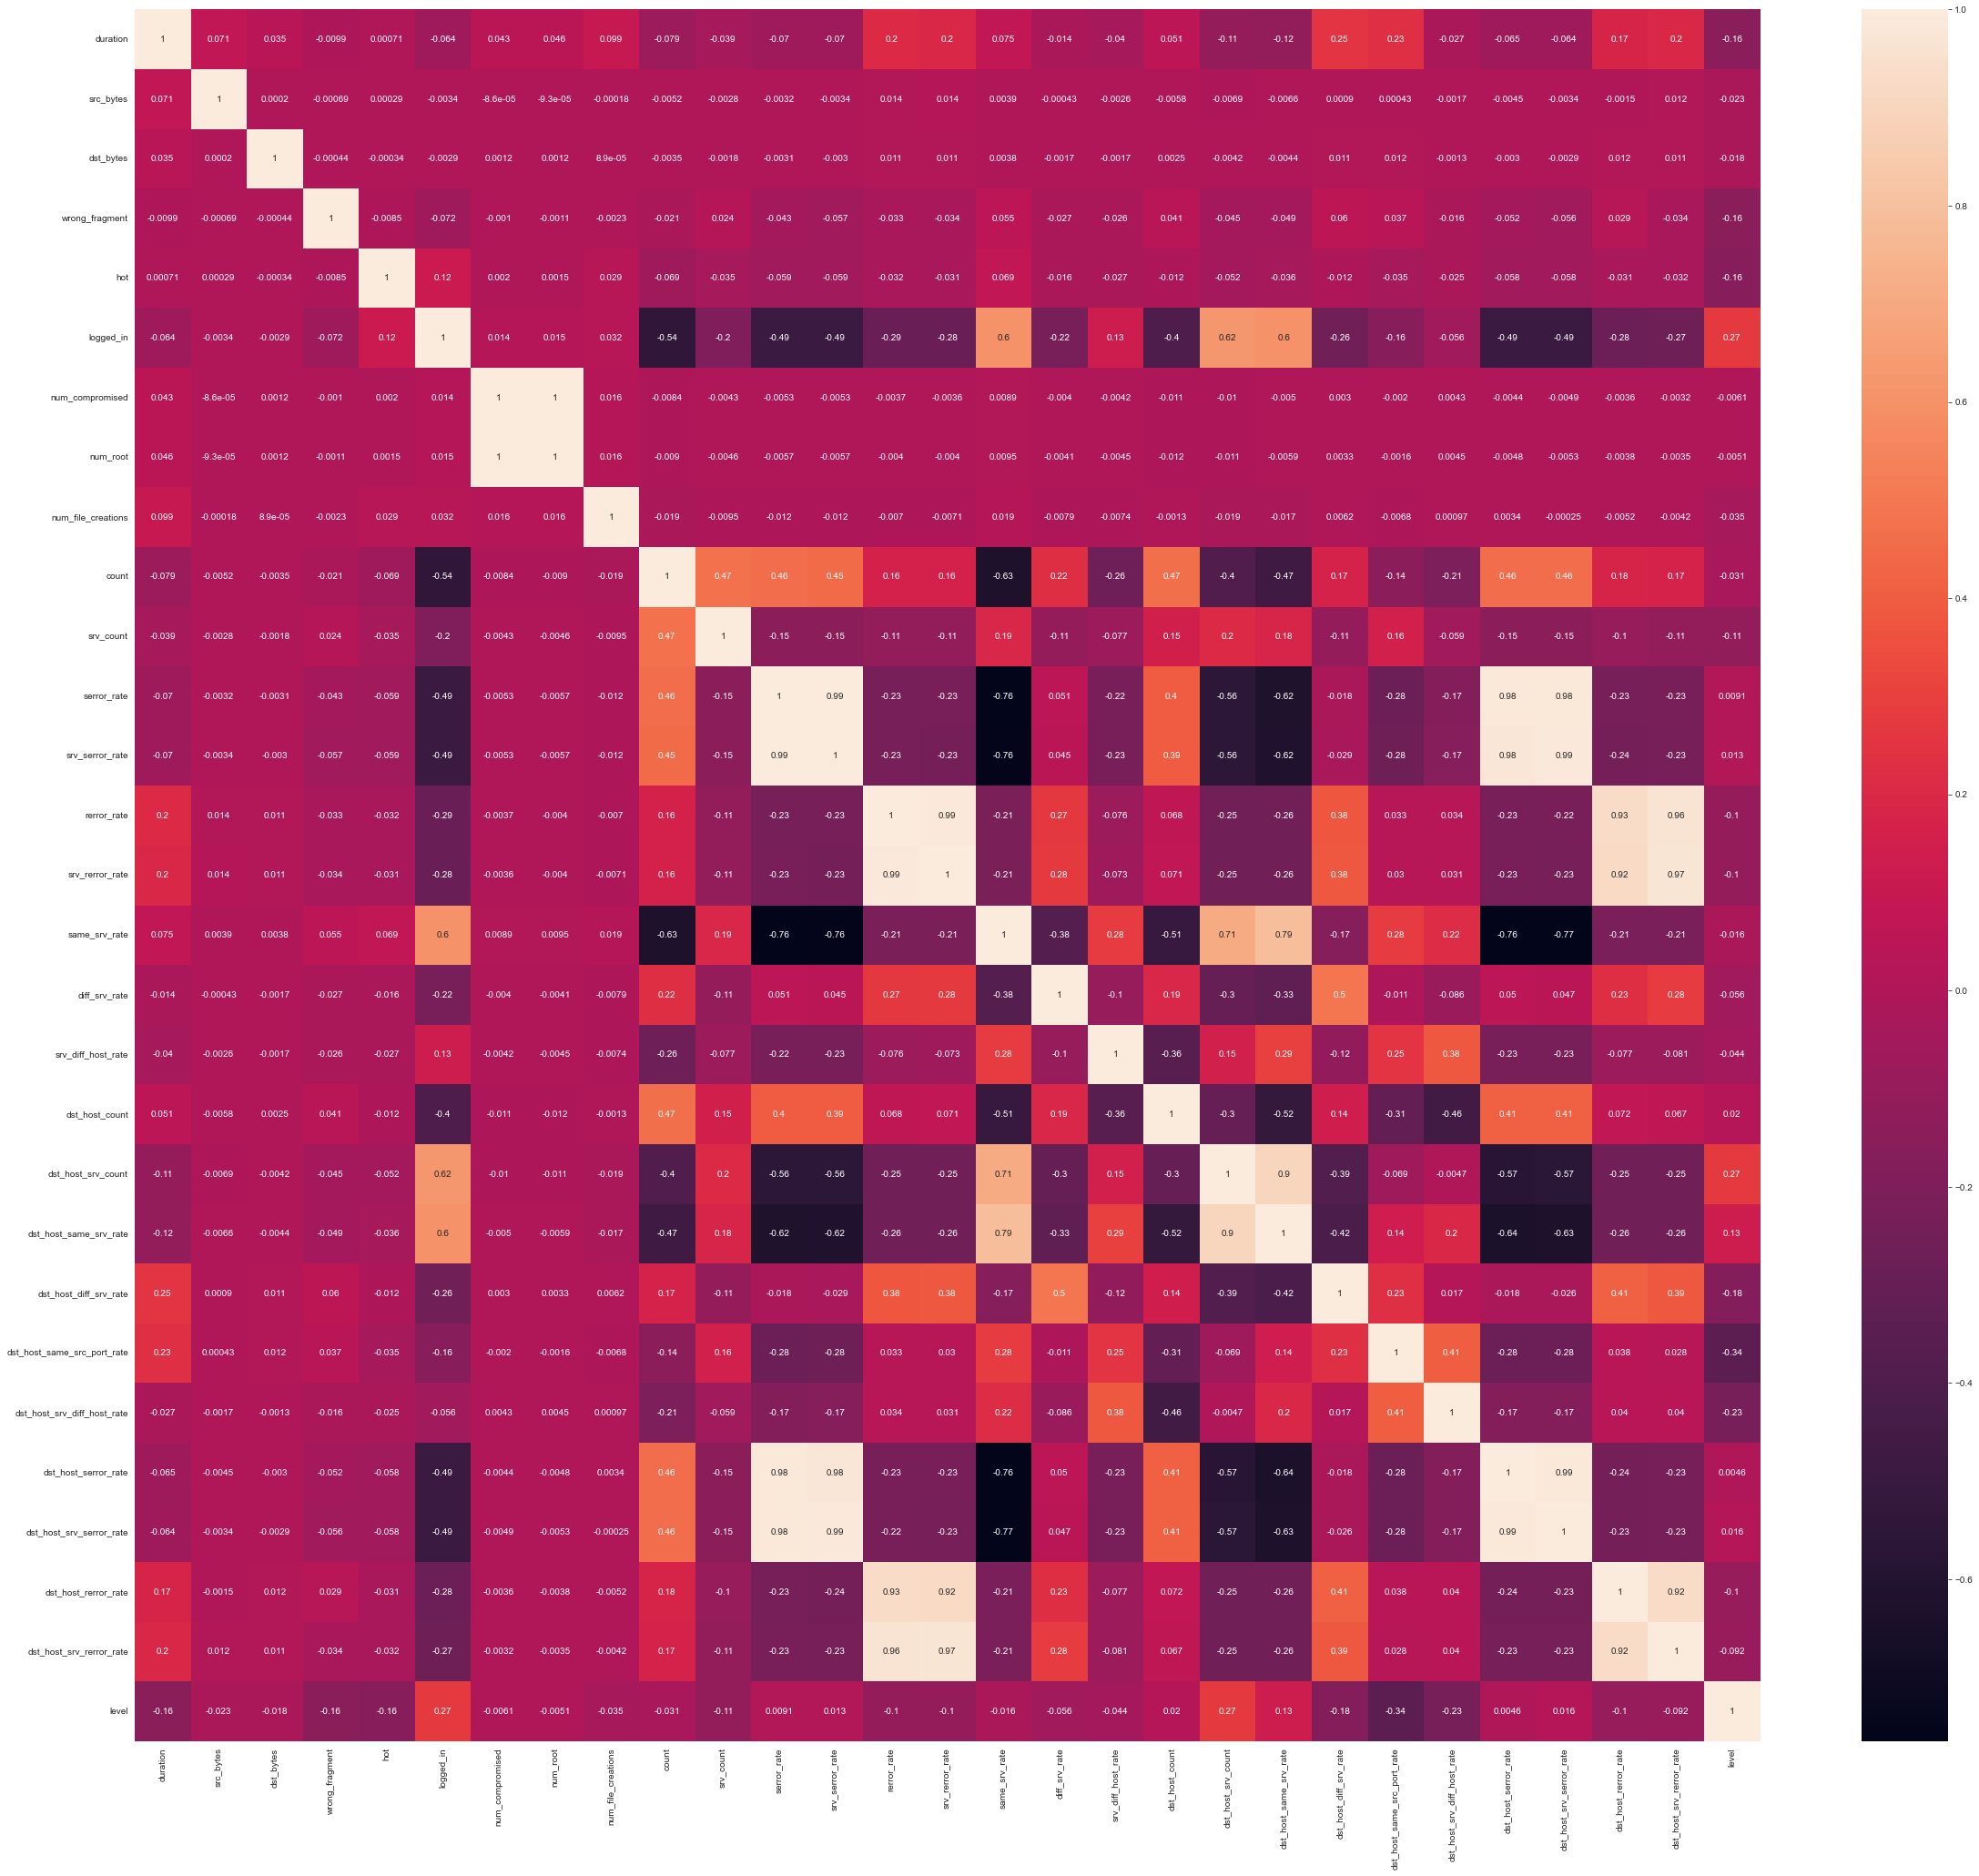

In [41]:
plt.figure(figsize=(40,35))
sns.heatmap(data_train.corr(), annot= True)

In [42]:
plt.figure(figsize=(40,35))
corr_df = data_train.corr().abs()
mask = np.triu(np.ones_like(corr_df, dtype=bool))
tri_df = corr_df.mask(mask)


<Figure size 2880x2520 with 0 Axes>

## Dropping columns with high correlation 

In [43]:
to_drop = [c for c in tri_df.columns if any(tri_df[c] >=  0.9)]
to_drop

['num_compromised',
 'serror_rate',
 'srv_serror_rate',
 'rerror_rate',
 'srv_rerror_rate',
 'dst_host_serror_rate',
 'dst_host_rerror_rate']

In [44]:
data_train = data_train.drop(columns=to_drop, axis=1)
data_test = data_test.drop(columns=to_drop, axis=1)


In [45]:
data_train.shape

(125972, 26)

In [46]:
data_train.loc[data_train['attack'] == "normal", "attack"] = 0
data_train.loc[data_train['attack'] != 0, "attack"] = 1

data_test['attack'] = data_test['attack'].map({'normal': 0, 'attack': 1})

In [47]:
quantitative_data = data_train.select_dtypes(include='number')

In [49]:
quantitative_data.describe()

,duration,src_bytes,dst_bytes,wrong_fragment,hot,logged_in,num_root,num_file_creations,count,srv_count,...,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_srv_serror_rate,dst_host_srv_rerror_rate,level
count,125972.000000,1.259720e+05,1.259720e+05,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,...,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000
mean,287.146929,4.556710e+04,1.977927e+04,0.022688,0.204411,0.395739,0.302194,0.012669,84.108207,27.738093,...,0.097322,182.149200,115.653725,0.521244,0.082952,0.148379,0.032543,0.278487,0.120241,19.504056
std,2604.525522,5.870354e+06,4.021285e+06,0.253531,2.149977,0.489011,24.399715,0.483937,114.508828,72.636092,...,0.259831,99.206565,110.702886,0.448950,0.188922,0.308998,0.112564,0.445670,0.319460,2.291512
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,...,0.000000,82.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,8.000000,...,0.000000,255.000000,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.000000,2.760000e+02,5.160000e+02,0.000000,0.000000,1.000000,0.000000,0.000000,143.000000,18.000000,...,0.000000,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,0.000000,21.000000
max,42908.000000,1.379964e+09,1.309937e+09,3.000000,77.000000,1.000000,7468.000000,43.000000,511.000000,511.000000,...,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [48]:
def remove_outliers(data, k=1.5):
    outliers = pd.DataFrame()
    for column in data.columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - k * IQR
        upper_bound = Q3 + k * IQR

        column_outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
        outliers = pd.concat([outliers, column_outliers])

    return outliers

outlier = remove_outliers(quantitative_data)
filtered_data_no_outliers = quantitative_data[~quantitative_data.index.isin(outlier.index)]

In [50]:
filtered_data_no_outliers.shape

(40621, 22)

In [51]:
df = filtered_data_no_outliers.loc[:, (filtered_data_no_outliers != 0).any(axis=0)]


In [52]:
df = pd.DataFrame(df)
df.shape

(40621, 15)

In [53]:
df.columns

Index(['src_bytes', 'dst_bytes', 'logged_in', 'count', 'srv_count',
       'same_srv_rate', 'diff_srv_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_srv_serror_rate', 'level'],
      dtype='object')

In [54]:
data_train = data_train.drop(columns=['service','flag'], axis=1)
data_test = data_test.drop(columns=['service','flag'], axis=1)


In [55]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Data columns (total 24 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125972 non-null  int64  
 1   src_bytes                    125972 non-null  int64  
 2   dst_bytes                    125972 non-null  int64  
 3   wrong_fragment               125972 non-null  int64  
 4   hot                          125972 non-null  int64  
 5   logged_in                    125972 non-null  int64  
 6   num_root                     125972 non-null  int64  
 7   num_file_creations           125972 non-null  int64  
 8   count                        125972 non-null  int64  
 9   srv_count                    125972 non-null  int64  
 10  same_srv_rate                125972 non-null  float64
 11  diff_srv_rate                125972 non-null  float64
 12  srv_diff_host_rate           125972 non-null  float64
 13 

# d_norm_pca

In [57]:
data_train.shape

(125972, 24)

In [58]:
data_test.shape

(22543, 24)

In [59]:
d_norm_pca_train = data_train.copy()
d_norm_pca_test = data_test.copy()


## Data Encoding 

In [60]:
d_norm_pca_train = pd.get_dummies(data_train, columns = ['protocol_type'])
d_norm_pca_test = pd.get_dummies(data_test, columns = ['protocol_type'])

In [61]:
d_norm_pca_train.shape

(125972, 26)

In [62]:
d_norm_pca_test.shape

(22543, 26)

## Data normalization  

### Scaling

<div style="background-color:#DBEDF3; padding:20px; font-size:15px">

📌Data scaling is necessary when the range of values differs across columns. By scaling the data, we ensure that each column has the same range or standardization of values. Standardization is important because higher scales may result in greater variance or covariance values, which can lead to bias. Therefore, we will begin by standardizing the features.

In [63]:
scaler = MinMaxScaler()
d_norm_pca_train_scaled = scaler.fit_transform(d_norm_pca_train)
d_norm_pca_train = pd.DataFrame(d_norm_pca_train_scaled, columns=d_norm_pca_train.columns)



In [64]:
scaler = MinMaxScaler()
d_norm_pca_test_scaled = scaler.fit_transform(d_norm_pca_test)
d_norm_pca_test = pd.DataFrame(d_norm_pca_train_scaled, columns=d_norm_pca_test.columns)

# PCA 

<div style="background-color:#DBEDF3; padding:20px; font-size:15px">

📌**Principal Component Analysis (PCA)** is a technique used to reduce the dimensions of a dataset while minimizing information loss. It does this by combining information from all variables into Principal Components (PCs) that are uncorrelated with each other. <blockquote>For example, a dataset with 10 variables will yield 10 PCs, each of which aims to summarize the information contained in the original variables while minimizing redundancy or correlation.<blockquote>

In [65]:
x_train = d_norm_pca_train.drop(['attack', 'level'] , axis = 1)
y_train= d_norm_pca_train['attack']

x_test = d_norm_pca_test.drop(['attack', 'level'] , axis = 1)
y_test= d_norm_pca_test['attack']

pca = PCA(n_components=20)
pca = pca.fit(x_train)
x_train_reduced = pca.transform(x_train)

pca = pca.fit(x_test)
x_test_reduced = pca.transform(x_test)


print("Number of original features is {} and of reduced features is {}".format(x_train.shape[1], x_train_reduced.shape[1]))
print("Number of original features is {} and of reduced features is {}".format(x_test.shape[1], x_test_reduced.shape[1]))


Number of original features is 24 and of reduced features is 20
Number of original features is 24 and of reduced features is 20


In [66]:
y_train = y_train.astype('int')

# Evaluation and Deployement 

In [56]:
kernal_evals = dict()
def evaluate_classification(model, name, X_train, X_test, y_train, y_test):
    train_accuracy = metrics.accuracy_score(y_train, model.predict(X_train))
    test_accuracy = metrics.accuracy_score(y_test, model.predict(X_test))

    train_precision = metrics.precision_score(y_train, model.predict(X_train))
    test_precision = metrics.precision_score(y_test, model.predict(X_test))

    train_recall = metrics.recall_score(y_train, model.predict(X_train))
    test_recall = metrics.recall_score(y_test, model.predict(X_test))

    train_f1 = metrics.f1_score(y_train, model.predict(X_train))
    test_f1 = metrics.f1_score(y_test, model.predict(X_test))

    cm_train = metrics.confusion_matrix(y_train, model.predict(X_train))
    tp_train = cm_train[1, 1]  # True Positives
    fn_train = cm_train[1, 0]  # False Negatives
    idc_train = tp_train / (tp_train + fn_train) if (tp_train + fn_train) > 0 else 0.0

    cm_test = metrics.confusion_matrix(y_test, model.predict(X_test))
    tp_test = cm_test[1, 1]  # True Positives
    fn_test = cm_test[1, 0]  # False Negatives
    idc_test = tp_test / (tp_test + fn_test) if (tp_test + fn_test) > 0 else 0.0


    kernal_evals[str(name)] = [train_accuracy, test_accuracy, train_precision, test_precision, train_recall, test_recall]
    print("Training Accuracy " + str(name) + " {}  Test Accuracy ".format(train_accuracy*100) + str(name) + " {}".format(test_accuracy*100))
    print("Training Precesion " + str(name) + " {}  Test Precesion ".format(train_precision*100) + str(name) + " {}".format(test_precision*100))
    print("Training Recall " + str(name) + " {}  Test Recall ".format(train_recall*100) + str(name) + " {}".format(test_recall*100))
    print("Training F1 Score " + str(name) + " {}  Test F1 Score ".format(train_f1*100) + str(name) + " {}".format(test_f1*100))
    print("Training IDC " + str(name) + " {}  Test IDC ".format(idc_train * 100) + str(name) + " {}".format(idc_test * 100))


    actual = y_test
    predicted = model.predict(X_test)
    confusion_matrix = metrics.confusion_matrix(actual, predicted)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['normal', 'attack'])

    fig, ax = plt.subplots(figsize=(10,10))
    ax.grid(False)
    cm_display.plot(ax=ax)

Training Accuracy Decision Tree 99.95792715841615  Test Accuracy Decision Tree 99.95792715841615
Training Precesion Decision Tree 99.98122834860663  Test Precesion Decision Tree 99.98122834860663
Training Recall Decision Tree 99.92836431860822  Test Recall Decision Tree 99.92836431860822
Training F1 Score Decision Tree 99.95478934393368  Test F1 Score Decision Tree 99.95478934393368
Training IDC Decision Tree 99.92836431860822  Test IDC Decision Tree 99.92836431860822


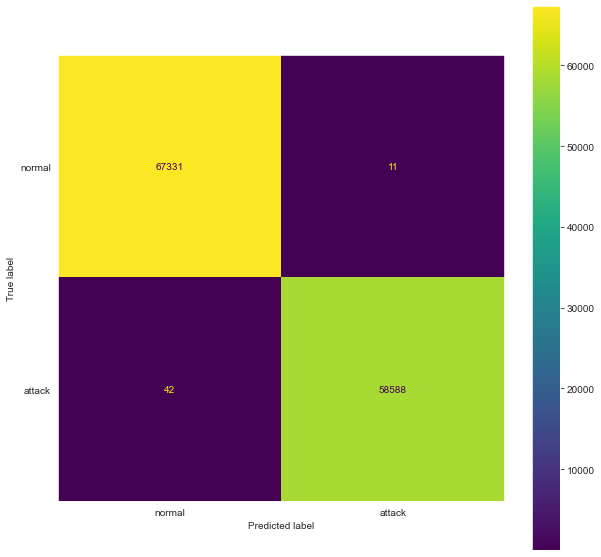

In [67]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(x_train_reduced, y_train)
evaluate_classification(dt_classifier, "Decision Tree", x_train_reduced, x_test_reduced, y_train, y_test)


Training Accuracy SVM 98.2567554694694  Test Accuracy SVM 98.2567554694694
Training Precesion SVM 98.90294627383017  Test Precesion SVM 98.90294627383017
Training Recall SVM 97.33412928534881  Test Recall SVM 97.33412928534881
Training F1 Score SVM 98.11226682712973  Test F1 Score SVM 98.11226682712973
Training IDC SVM 97.33412928534881  Test IDC SVM 97.33412928534881


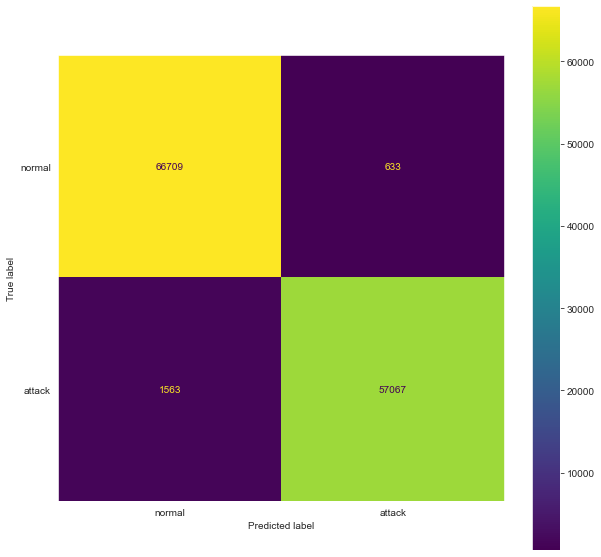

In [68]:
from sklearn.svm import SVC
svm_classifier = SVC()
svm_classifier.fit(x_train_reduced, y_train)
evaluate_classification(svm_classifier, "SVM", x_train_reduced, x_test_reduced, y_train, y_test)

Training Accuracy Logistic Regression 95.30213063220398  Test Accuracy Logistic Regression 95.30213063220398
Training Precesion Logistic Regression 96.05116019010343  Test Precesion Logistic Regression 96.05116019010343
Training Recall Logistic Regression 93.76087327306838  Test Recall Logistic Regression 93.76087327306838
Training F1 Score Logistic Regression 94.89219934059483  Test F1 Score Logistic Regression 94.89219934059483
Training IDC Logistic Regression 93.76087327306838  Test IDC Logistic Regression 93.76087327306838


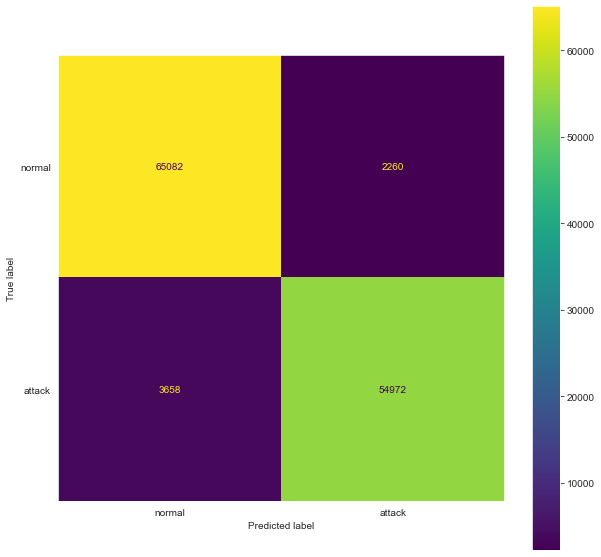

In [69]:
# Création d'un modèle LogisticRegression
lr = LogisticRegression().fit(x_train_reduced, y_train)
# Évaluation du modèle LogisticRegression
evaluate_classification(lr, "Logistic Regression", x_train_reduced, x_test_reduced, y_train, y_test)

In [70]:
# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=20).fit(x_train_reduced, y_train)

evaluate_classification(knn, "KNeighborsClassifier", x_train_reduced, x_test_reduced, y_train, y_test)

Training Accuracy KNeighborsClassifier 99.20776045470421  Test Accuracy KNeighborsClassifier 99.20776045470421
Training Precesion KNeighborsClassifier 99.30531791116283  Test Precesion KNeighborsClassifier 99.30531791116283
Training Recall KNeighborsClassifier 98.99027801466825  Test Recall KNeighborsClassifier 98.99027801466825
Training F1 Score KNeighborsClassifier 99.14754770487043  Test F1 Score KNeighborsClassifier 99.14754770487043
Training IDC KNeighborsClassifier 98.99027801466825  Test IDC KNeighborsClassifier 98.99027801466825


KeyboardInterrupt: 

Training Accuracy Random Forest 99.95792715841615  Test Accuracy Random Forest 99.95792715841615
Training Precesion Random Forest 99.96758508914101  Test Precesion Random Forest 99.96758508914101
Training Recall Random Forest 99.94200921030189  Test Recall Random Forest 99.94200921030189
Training F1 Score Random Forest 99.95479551366796  Test F1 Score Random Forest 99.95479551366796
Training IDC Random Forest 99.94200921030189  Test IDC Random Forest 99.94200921030189


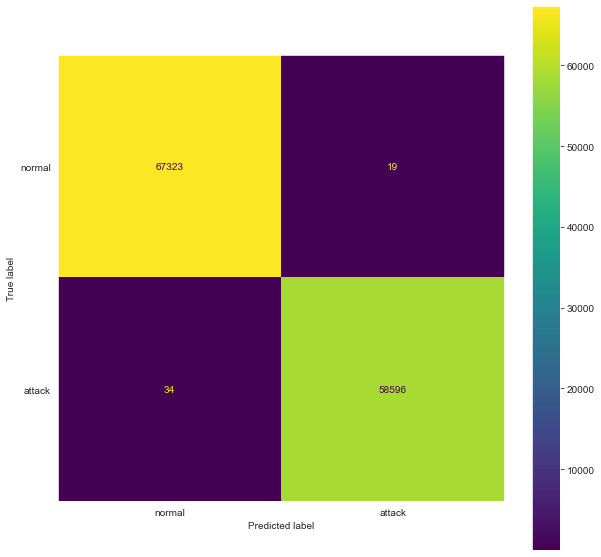

In [71]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the Random Forest Classifier to the reduced training data
rf_classifier.fit(x_train_reduced, y_train)
#Evaluate the Random Forest Classifier
evaluate_classification(rf_classifier, "Random Forest", x_train_reduced, x_test_reduced, y_train, y_test)

# Hyperparameter Tuning 


# Decision Tree 

In [74]:
from sklearn.model_selection import GridSearchCV, cross_val_score
# Decision Tree
dt_classifier = DecisionTreeClassifier()
dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}
dt_grid_search = GridSearchCV(estimator=dt_classifier, param_grid=dt_param_grid, cv=5, scoring='accuracy')
dt_grid_search.fit(x_train_reduced, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [75]:
## Print the best hyperparameters found
print("Decision Tree Best Hyperparameters:", dt_grid_search.best_params_)

Decision Tree Best Hyperparameters: {'criterion': 'gini', 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}


In [76]:
# Evaluate the performance of classifier using cross-validation
dt_cross_val_score = cross_val_score(dt_grid_search.best_estimator_, x_train_reduced, y_train, cv=5, scoring='accuracy')

In [77]:
# Print the cross-validation scores for each classifier
print("Decision Tree Cross-Validation Scores:", dt_cross_val_score)

Decision Tree Cross-Validation Scores: [0.99432427 0.99456241 0.99472097 0.99464158 0.99464158]


In [92]:
# Decision Tree
best_dt_model = dt_grid_search.best_estimator_
y_pred_dt = best_dt_model.predict(x_test_reduced)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Test Accuracy:", accuracy_dt)

Decision Tree Test Accuracy: 0.999499888864192


Training Accuracy Decision Tree 99.9499888864192  Test Accuracy Decision Tree 99.9499888864192
Training Precesion Decision Tree 99.98122514465173  Test Precesion Decision Tree 99.98122514465173
Training Recall Decision Tree 99.91130820399114  Test Recall Decision Tree 99.91130820399114
Training F1 Score Decision Tree 99.9462544468047  Test F1 Score Decision Tree 99.9462544468047
Training IDC Decision Tree 99.91130820399114  Test IDC Decision Tree 99.91130820399114


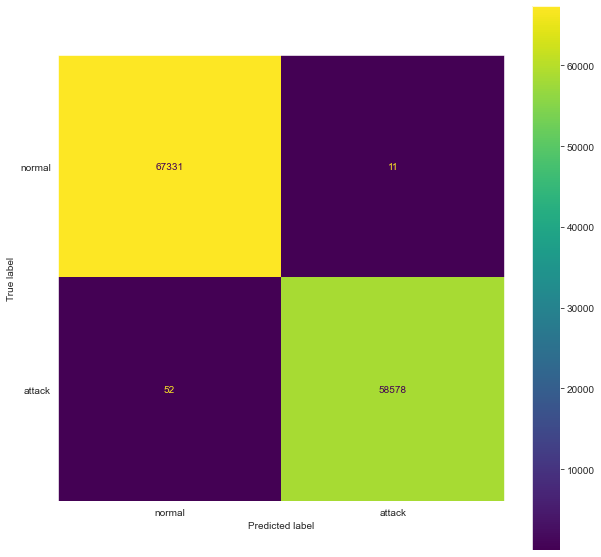

In [108]:
evaluate_classification(best_dt_model, "Decision Tree", x_train_reduced, x_test_reduced, y_train, y_test)


# SVC

In [98]:
# SVC
svc_classifier = SVC()
svc_param_grid = {
    'C': [0.1, 1],
    'kernel': ['linear', 'rbf'],
}
svc_grid_search = GridSearchCV(estimator=svc_classifier, param_grid=svc_param_grid, cv=5, scoring='accuracy')
svc_grid_search.fit(x_train_reduced, y_train)


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1], 'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [99]:
print("SVC Best Hyperparameters:", svc_grid_search.best_params_)

SVC Best Hyperparameters: {'C': 1, 'kernel': 'rbf'}


In [100]:
svc_cross_val_score = cross_val_score(svc_grid_search.best_estimator_, x_train_reduced, y_train, cv=5, scoring='accuracy')

In [101]:
print("SVC Cross-Validation Scores:", svc_cross_val_score)

SVC Cross-Validation Scores: [0.98146458 0.98209962 0.98221799 0.98122569 0.98209891]


In [102]:
# SVC
best_svc_model = svc_grid_search.best_estimator_
y_pred_svc = best_svc_model.predict(x_test_reduced)
accuracy_svc = accuracy_score(y_test, y_pred_svc)
print("SVC Test Accuracy:", accuracy_svc)

SVC Test Accuracy: 0.982567554694694


Training Accuracy SVC 98.2567554694694  Test Accuracy SVC 98.2567554694694
Training Precesion SVC 98.90294627383017  Test Precesion SVC 98.90294627383017
Training Recall SVC 97.33412928534881  Test Recall SVC 97.33412928534881
Training F1 Score SVC 98.11226682712973  Test F1 Score SVC 98.11226682712973
Training IDC SVC 97.33412928534881  Test IDC SVC 97.33412928534881


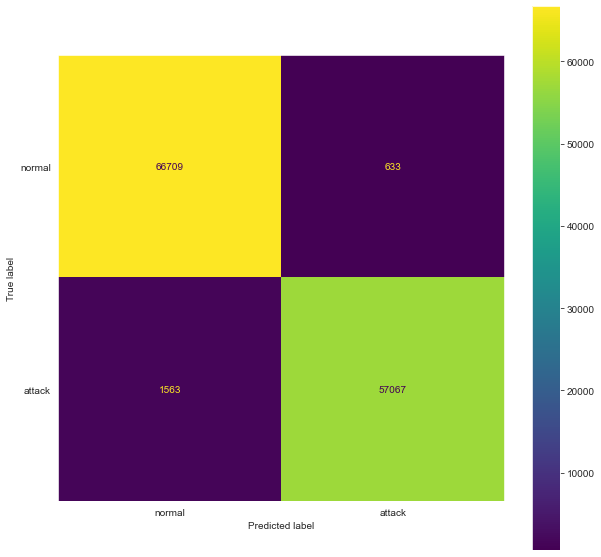

In [109]:
evaluate_classification(best_svc_model, "SVC", x_train_reduced, x_test_reduced, y_train, y_test)


# Logistic Regression 

In [103]:
## Logistic Regression
lr_classifier = LogisticRegression()
lr_param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l2'],
}
lr_grid_search = GridSearchCV(estimator=lr_classifier, param_grid=lr_param_grid, cv=5, scoring='accuracy')
lr_grid_search.fit(x_train_reduced, y_train)


C:\Users\Ons\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Ons\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = 

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10], 'penalty': ['l2']},
             scoring='accuracy')

In [104]:
print("Logistic Regression Best Hyperparameters:", lr_grid_search.best_params_)

Logistic Regression Best Hyperparameters: {'C': 0.1, 'penalty': 'l2'}


In [105]:
lr_cross_val_score = cross_val_score(lr_grid_search.best_estimator_, x_train_reduced, y_train, cv=5, scoring='accuracy')

In [106]:
print("Logistic Regression Cross-Validation Scores:", lr_cross_val_score)

Logistic Regression Cross-Validation Scores: [0.95391943 0.95368129 0.95336191 0.95419544 0.95483052]


In [107]:
from sklearn.metrics import accuracy_score
# Logistic Regression
best_lr_model = lr_grid_search.best_estimator_
y_pred_lr = best_lr_model.predict(x_test_reduced)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression Test Accuracy:", accuracy_lr)

Logistic Regression Test Accuracy: 0.9537913187057442


Training Accuracy lr 95.37913187057441  Test Accuracy lr 95.37913187057441
Training Precesion lr 96.09804640444142  Test Precesion lr 96.09804640444142
Training Recall lr 93.88367729831144  Test Recall lr 93.88367729831144
Training F1 Score lr 94.97795684545635  Test F1 Score lr 94.97795684545635
Training IDC lr 93.88367729831144  Test IDC lr 93.88367729831144


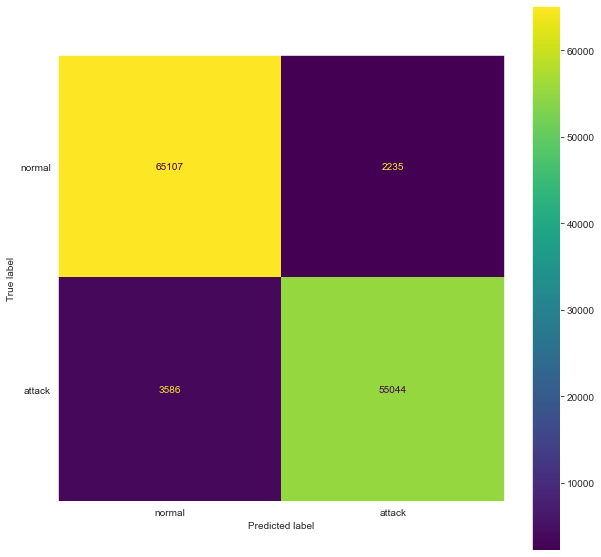

In [110]:
evaluate_classification(best_lr_model, "lr", x_train_reduced, x_test_reduced, y_train, y_test)

# KNN 

In [87]:
knn_classifier = KNeighborsClassifier()
knn_param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'p': [1, 2],
}
knn_grid_search = GridSearchCV(estimator=knn_classifier, param_grid=knn_param_grid, cv=5, scoring='accuracy')
knn_grid_search.fit(x_train_reduced, y_train)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [88]:
print("KNN Best Hyperparameters:", knn_grid_search.best_params_)

KNN Best Hyperparameters: {'n_neighbors': 3, 'p': 2, 'weights': 'distance'}


In [89]:
knn_cross_val_score = cross_val_score(knn_grid_search.best_estimator_,x_train_reduced, y_train, cv=5, scoring='accuracy')

In [90]:
print("KNN Cross-Validation Scores:", knn_cross_val_score)

KNN Cross-Validation Scores: [0.99507839 0.99476087 0.99491943 0.99543542 0.99567357]


In [112]:
# KNN
best_knn_model = knn_grid_search.best_estimator_
y_pred_knn = best_knn_model.predict(x_test_reduced)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("KNN Test Accuracy:", accuracy_knn)

KNN Test Accuracy: 0.999499888864192


Training Accuracy lr 95.37913187057441  Test Accuracy lr 95.37913187057441
Training Precesion lr 96.09804640444142  Test Precesion lr 96.09804640444142
Training Recall lr 93.88367729831144  Test Recall lr 93.88367729831144
Training F1 Score lr 94.97795684545635  Test F1 Score lr 94.97795684545635
Training IDC lr 93.88367729831144  Test IDC lr 93.88367729831144


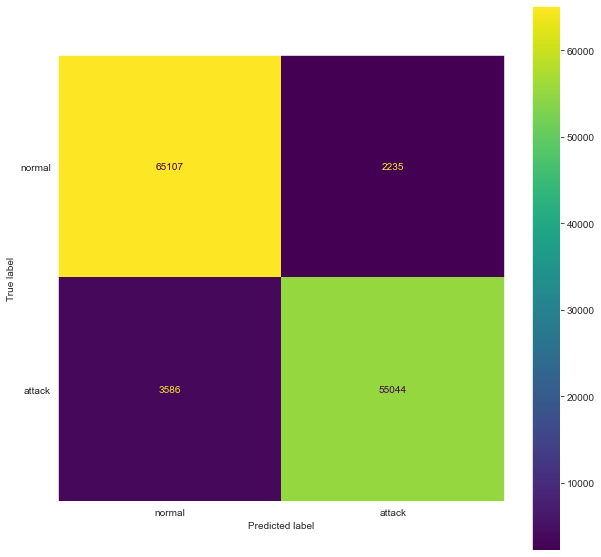

In [113]:
evaluate_classification(best_lr_model, "lr", x_train_reduced, x_test_reduced, y_train, y_test)

# Random Forest 

In [94]:
# Random Forest
rf_classifier = RandomForestClassifier()
rf_param_grid = {
    'criterion': ['gini', 'entropy'],
    'n_estimators': [50, 100],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
}
rf_grid_search = GridSearchCV(estimator=rf_classifier, param_grid=rf_param_grid, cv=5, scoring='accuracy')
rf_grid_search.fit(x_train_reduced, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10], 'min_samples_split': [2, 5],
                         'n_estimators': [50, 100]},
             scoring='accuracy')

In [95]:
print("Random Forest Best Hyperparameters:", rf_grid_search.best_params_)

Random Forest Best Hyperparameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}


In [96]:
rf_cross_val_score = cross_val_score(rf_grid_search.best_estimator_, x_train_reduced, y_train, cv=5, scoring='accuracy')

In [97]:
print("Random Forest Cross-Validation Scores:", rf_cross_val_score)

Random Forest Cross-Validation Scores: [0.9958722  0.99642786 0.99611018 0.99583234 0.99630864]


In [118]:
# Random Forest
best_rf_model = rf_grid_search.best_estimator_
y_pred_rf = best_rf_model.predict(x_test_reduced)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Test Accuracy:", accuracy_rf)

Random Forest Test Accuracy: 0.9995792715841616


Training Accuracy rf 99.95792715841615  Test Accuracy rf 99.95792715841615
Training Precesion rf 99.95906183368871  Test Precesion rf 99.95906183368871
Training Recall rf 99.95053726761044  Test Recall rf 99.95053726761044
Training F1 Score rf 99.95479936889686  Test F1 Score rf 99.95479936889686
Training IDC rf 99.95053726761044  Test IDC rf 99.95053726761044


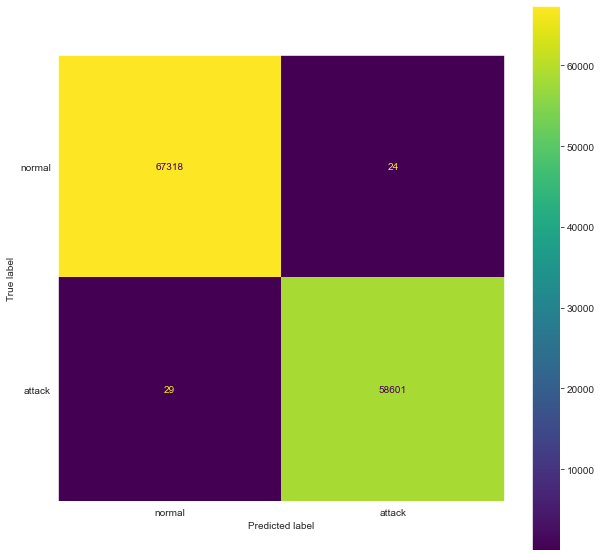

In [120]:
evaluate_classification(best_rf_model, "rf", x_train_reduced, x_test_reduced, y_train, y_test)

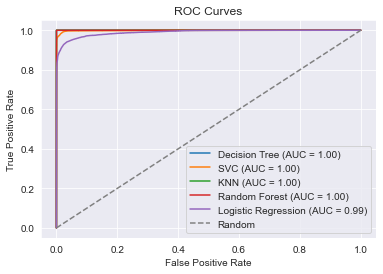

In [121]:
# ROC curve 
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Decision Tree
dt_fpr, dt_tpr, _ = roc_curve(y_test, best_dt_model.predict_proba(x_test_reduced)[:, 1])
dt_auc = auc(dt_fpr, dt_tpr)
plt.plot(dt_fpr, dt_tpr, label=f'Decision Tree (AUC = {dt_auc:.2f})')

# SVC
svc_fpr, svc_tpr, _ = roc_curve(y_test, best_svc_model.decision_function(x_test_reduced))
svc_auc = auc(svc_fpr, svc_tpr)
plt.plot(svc_fpr, svc_tpr, label=f'SVC (AUC = {svc_auc:.2f})')

# KNN
knn_fpr, knn_tpr, _ = roc_curve(y_test, best_knn_model.predict_proba(x_test_reduced)[:, 1])
knn_auc = auc(knn_fpr, knn_tpr)
plt.plot(knn_fpr, knn_tpr, label=f'KNN (AUC = {knn_auc:.2f})')

# Random Forest
rf_fpr, rf_tpr, _ = roc_curve(y_test, best_rf_model.predict_proba(x_test_reduced)[:, 1])
rf_auc = auc(rf_fpr, rf_tpr)
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_auc:.2f})')

# Logistic Regression
lr_fpr, lr_tpr, _ = roc_curve(y_test, best_lr_model.predict_proba(x_test_reduced)[:, 1])
lr_auc = auc(lr_fpr, lr_tpr)
plt.plot(lr_fpr, lr_tpr, label=f'Logistic Regression (AUC = {lr_auc:.2f})')

# Plotting settings
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='lower right')
plt.show()
